In [50]:
import numpy as np
import matplotlib.pyplot as plt
import os, glob, re, json
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import LogNorm, SymLogNorm, CenteredNorm
from argparse import Namespace
import math, json
import matplotlib.pylab as pylab
import h5py
from tqdm import tqdm

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 2000)
pd.set_option('display.max_colwidth', 200)

result_dir = os.path.join(os.getenv("CENSAI_PATH"), "results")
data_path = os.path.join(os.getenv("CENSAI_PATH"), "data")
models_path = os.path.join(os.getenv("CENSAI_PATH"), "models")

params = {'legend.fontsize': 'x-large',
#           'figure.figsize': (10, 10),
         'axes.labelsize': 'x-large',
         'axes.titlesize': 30,#'x-large',
         'xtick.labelsize':'large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)
plt.style.use("science")

In [51]:
# model = "RIMSU512_k128_NIE2nsvdO_033_TS10_F16_L5_IK11_NLrelu_al0.04_GAplus_42_B10_lr0.0005_dr0.8_ds5000_TWquadratic_210923032150"
model = "RIMSU512_hk128_TNG2nsO_008_F16_IK7_NLrelu_82_B10_lr0.0005_dr0.5_ds10000_211005114812"
path = os.path.join(os.getenv("CENSAI_PATH"), "data", "rim_predictions", model, "predictions.h5")
hf = h5py.File(path, 'r')

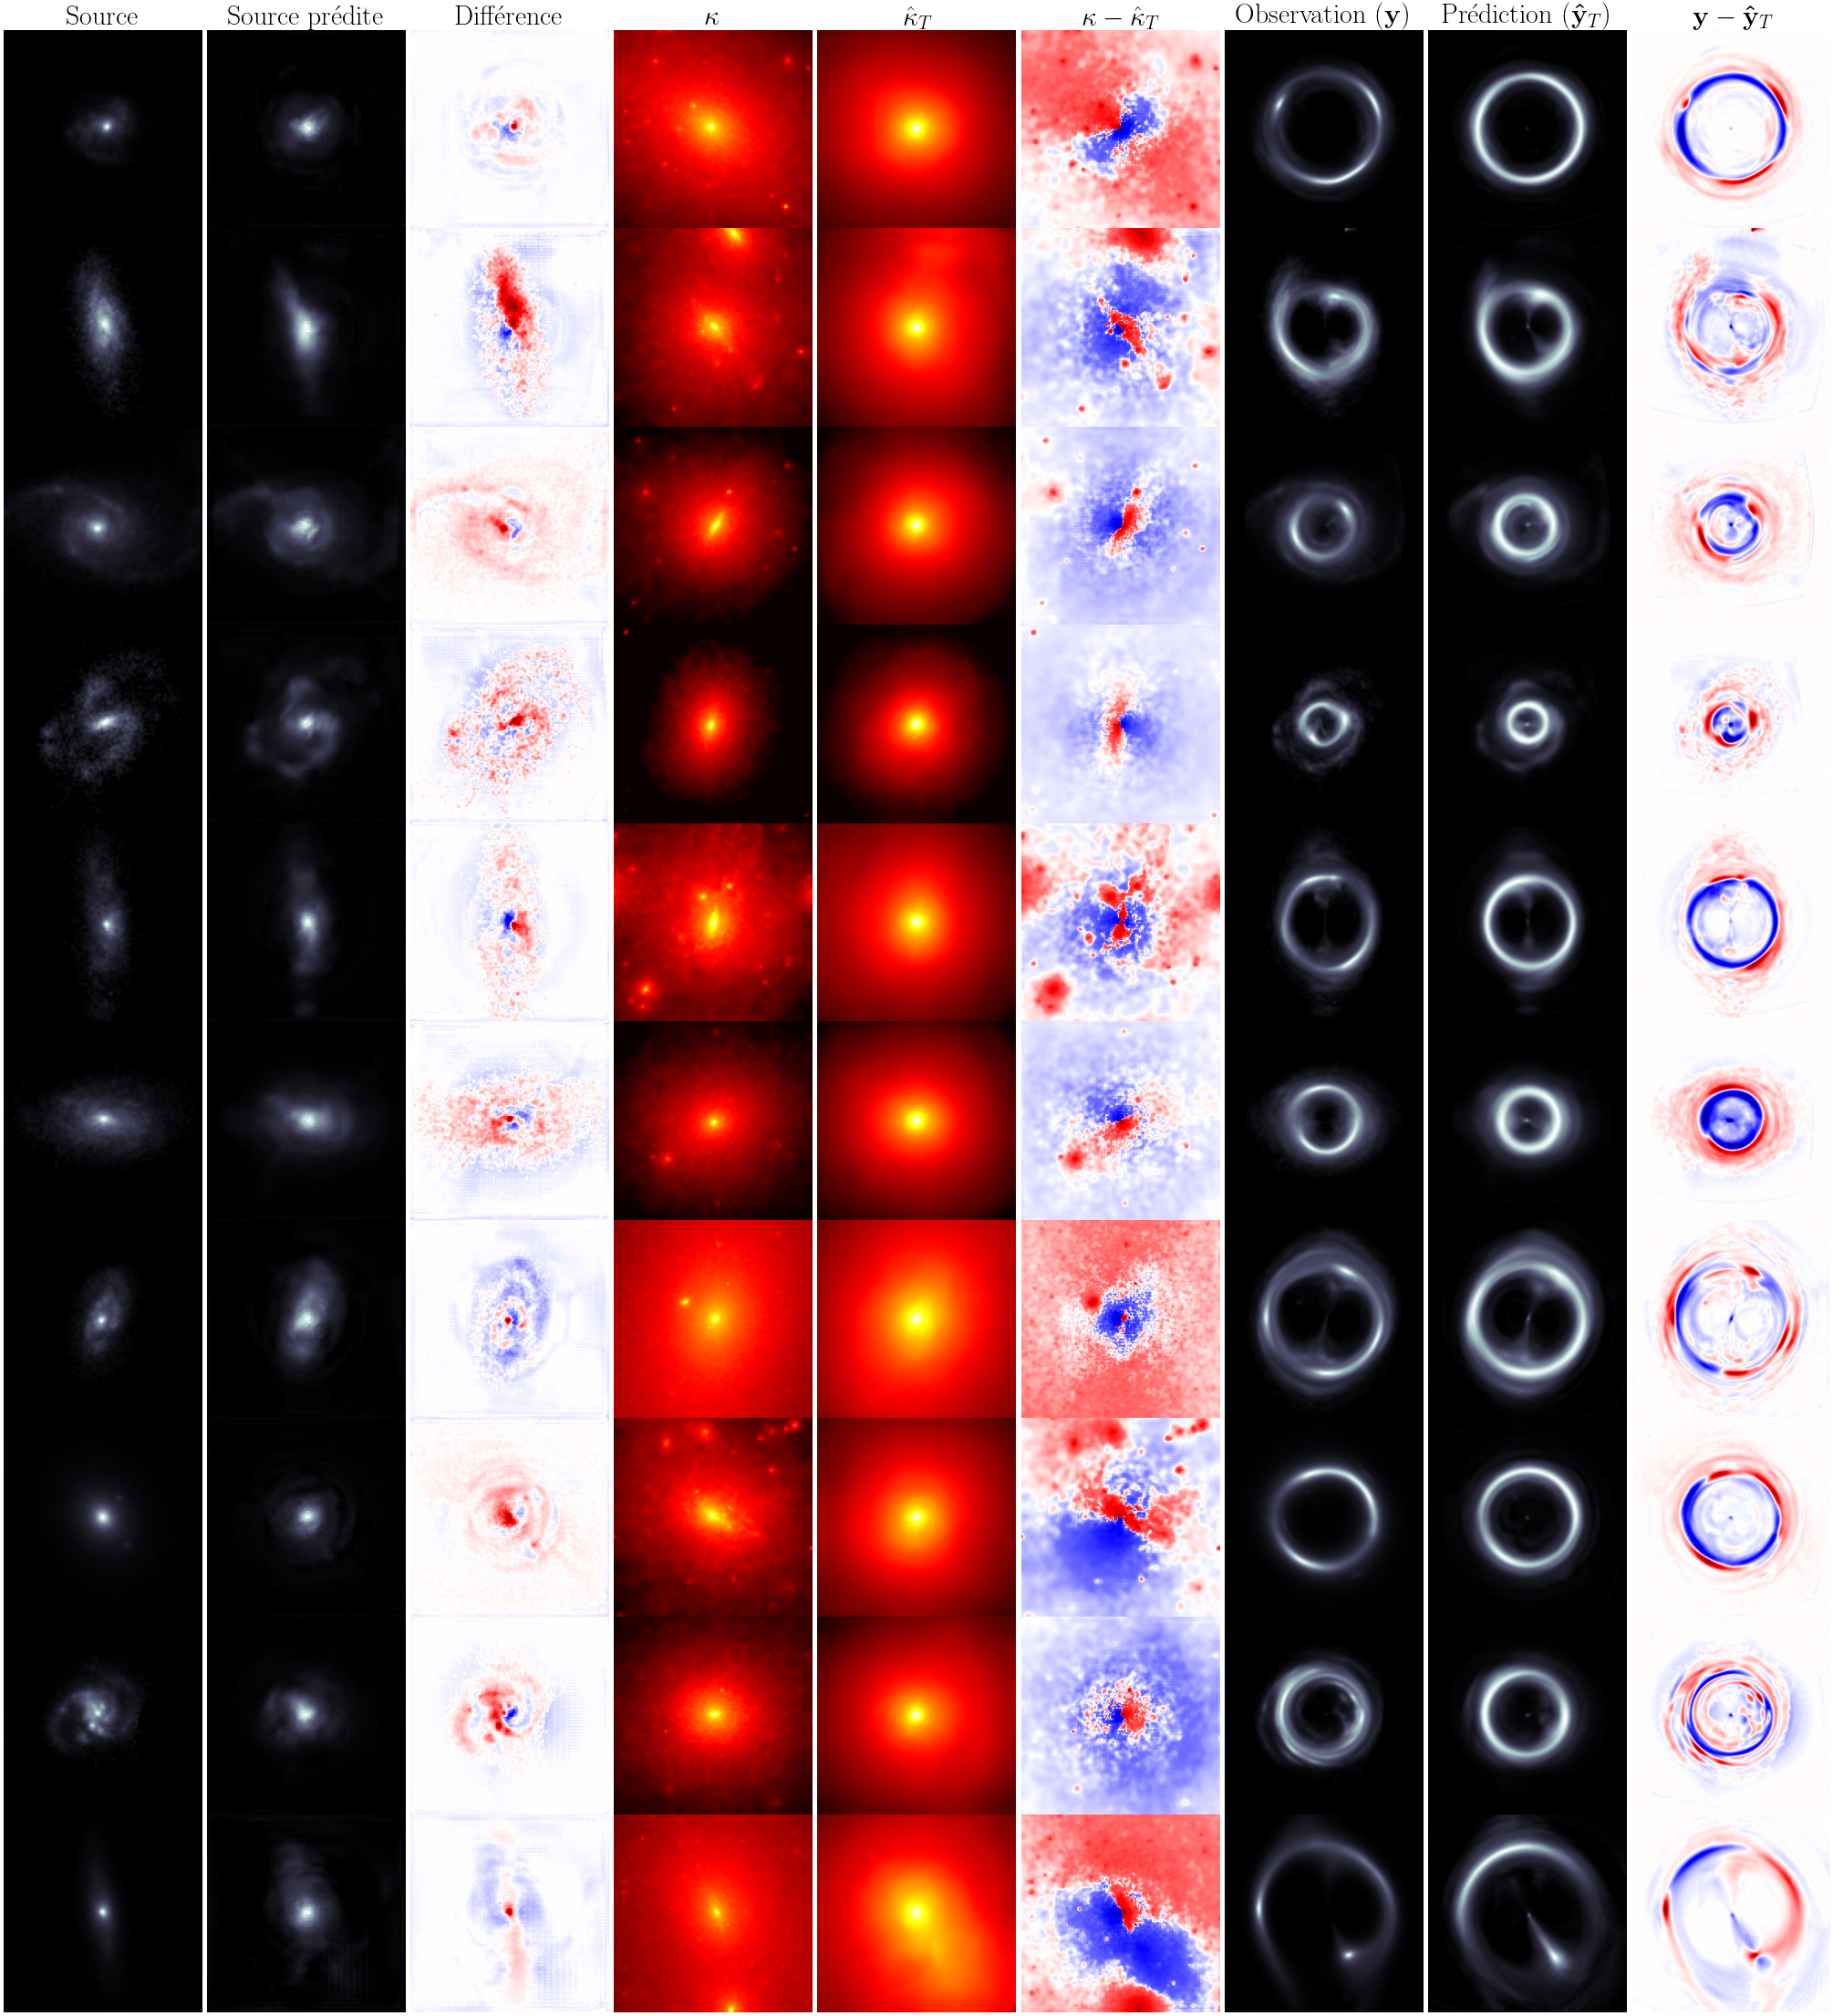

In [61]:
N = 10
start = 60

fig, axs = plt.subplots(N, 9, figsize=(36, 4 * N))
for i in range(N):
    k = i + start
    lens = np.array(hf[f"data{k:03d}/lens"]).squeeze()
    source = np.array(hf[f"data{k:03d}/source"]).squeeze()
    kappa = np.array(hf[f"data{k:03d}/kappa"]).squeeze()
    lens_pred = np.array(hf[f"data{k:03d}/lens_pred"]).squeeze()
    source_pred = np.array(hf[f"data{k:03d}/source_pred"]).squeeze()[-1]
    kappa_pred = np.array(hf[f"data{k:03d}/kappa_pred"]).squeeze()[-1]
    

    axs[i, 0].imshow(source, cmap="bone", origin="lower")
    axs[i, 1].imshow(source_pred, cmap="bone", origin="lower")
    axs[i, 2].imshow(source - source_pred, cmap="seismic", norm=CenteredNorm(), origin="lower")
    
    axs[i, 3].imshow(kappa, cmap="hot", norm=LogNorm(vmin=5e-2), origin="lower")
    axs[i, 4].imshow(kappa_pred, cmap="hot", norm=LogNorm(vmin=5e-2), origin="lower")
    axs[i, 5].imshow(kappa - kappa_pred, cmap="seismic", norm=SymLogNorm(linthresh=1e-1, base=10, vmax=100, vmin=-100), origin="lower")
    
    axs[i, 6].imshow(lens, cmap="bone", origin="lower")
    axs[i, 7].imshow(lens_pred, cmap="bone", origin="lower")
    axs[i, 8].imshow(lens - lens_pred, cmap="seismic", norm=CenteredNorm(), origin="lower")
    
for i in range(N):
    for j in range(9):
        axs[i, j].axis("off")


axs[0, 0].set_title("Source")
axs[0, 1].set_title("Source prédite")
axs[0, 2].set_title("Différence")
axs[0, 3].set_title("$\kappa$")
axs[0, 4].set_title("$\hat{\kappa}_T$")
axs[0, 5].set_title("$\kappa - \hat{\kappa}_T$")
axs[0, 6].set_title("Observation ($\mathbf{y}$)")
axs[0, 7].set_title("Prédiction ($\mathbf{\hat{y}}_T$)")
axs[0, 8].set_title("$\mathbf{y} - \mathbf{\hat{y}}_T$")
plt.subplots_adjust(wspace=0, hspace=0)
plt.savefig(f"rim_pred{start:d}.png")

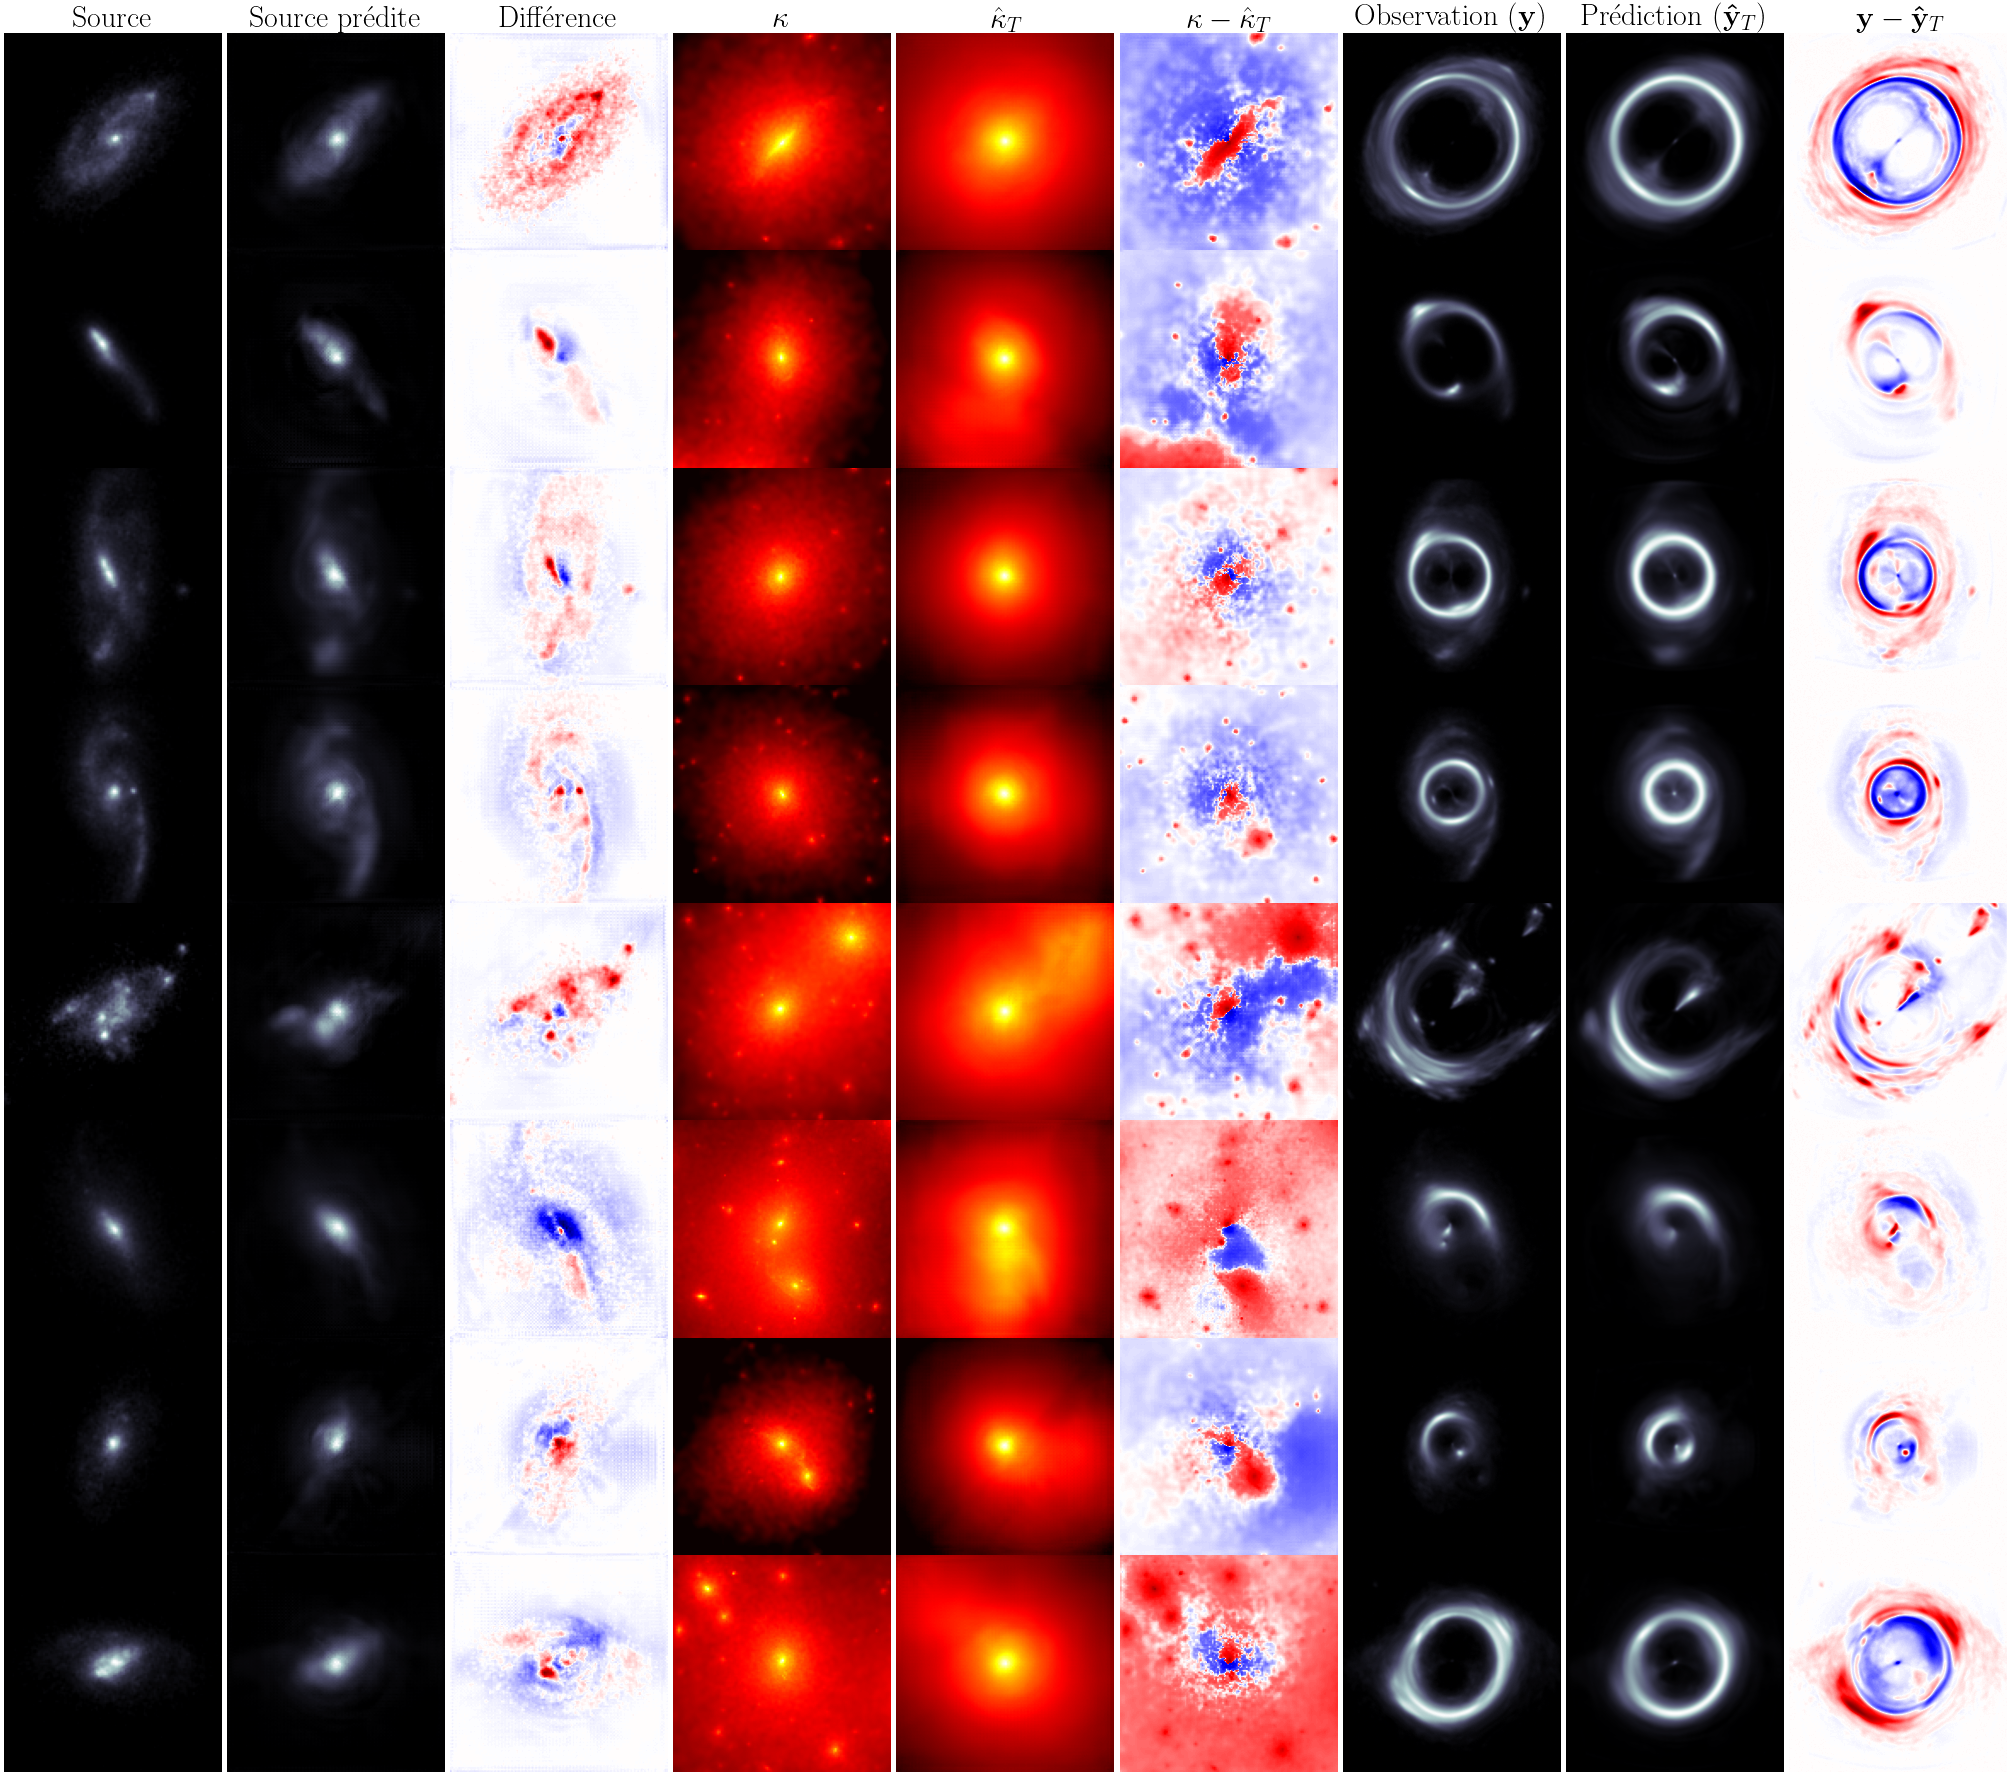

In [49]:
indexes = [9, 58, 10, 29, 59, 36, 12, 51]
N = len(indexes)

fig, axs = plt.subplots(N, 9, figsize=(36, 4 * N))
for i, k in enumerate(indexes):
    lens = np.array(hf[f"data{k:03d}/lens"]).squeeze()
    source = np.array(hf[f"data{k:03d}/source"]).squeeze()
    kappa = np.array(hf[f"data{k:03d}/kappa"]).squeeze()
    lens_pred = np.array(hf[f"data{k:03d}/lens_pred"]).squeeze()
    source_pred = np.array(hf[f"data{k:03d}/source_pred"]).squeeze()[-1]
    kappa_pred = np.array(hf[f"data{k:03d}/kappa_pred"]).squeeze()[-1]
    

    axs[i, 0].imshow(source, cmap="bone", origin="lower")
    axs[i, 1].imshow(source_pred, cmap="bone", origin="lower")
    axs[i, 2].imshow(source - source_pred, cmap="seismic", norm=CenteredNorm(), origin="lower")
    
    axs[i, 3].imshow(kappa, cmap="hot", norm=LogNorm(vmin=5e-2), origin="lower")
    axs[i, 4].imshow(kappa_pred, cmap="hot", norm=LogNorm(vmin=5e-2), origin="lower")
    axs[i, 5].imshow(kappa - kappa_pred, cmap="seismic", norm=SymLogNorm(linthresh=1e-1, base=10, vmax=100, vmin=-100), origin="lower")
    
    axs[i, 6].imshow(lens, cmap="bone", origin="lower")
    axs[i, 7].imshow(lens_pred, cmap="bone", origin="lower")
    axs[i, 8].imshow(lens - lens_pred, cmap="seismic", norm=CenteredNorm(), origin="lower")
    
for i in range(N):
    for j in range(9):
        axs[i, j].axis("off")


axs[0, 0].set_title("Source")
axs[0, 1].set_title("Source prédite")
axs[0, 2].set_title("Différence")
axs[0, 3].set_title("$\kappa$")
axs[0, 4].set_title("$\hat{\kappa}_T$")
axs[0, 5].set_title("$\kappa - \hat{\kappa}_T$")
axs[0, 6].set_title("Observation ($\mathbf{y}$)")
axs[0, 7].set_title("Prédiction ($\mathbf{\hat{y}}_T$)")
axs[0, 8].set_title("$\mathbf{y} - \mathbf{\hat{y}}_T$")
plt.subplots_adjust(wspace=0, hspace=0);
plt.savefig("poster_main_fig.png")

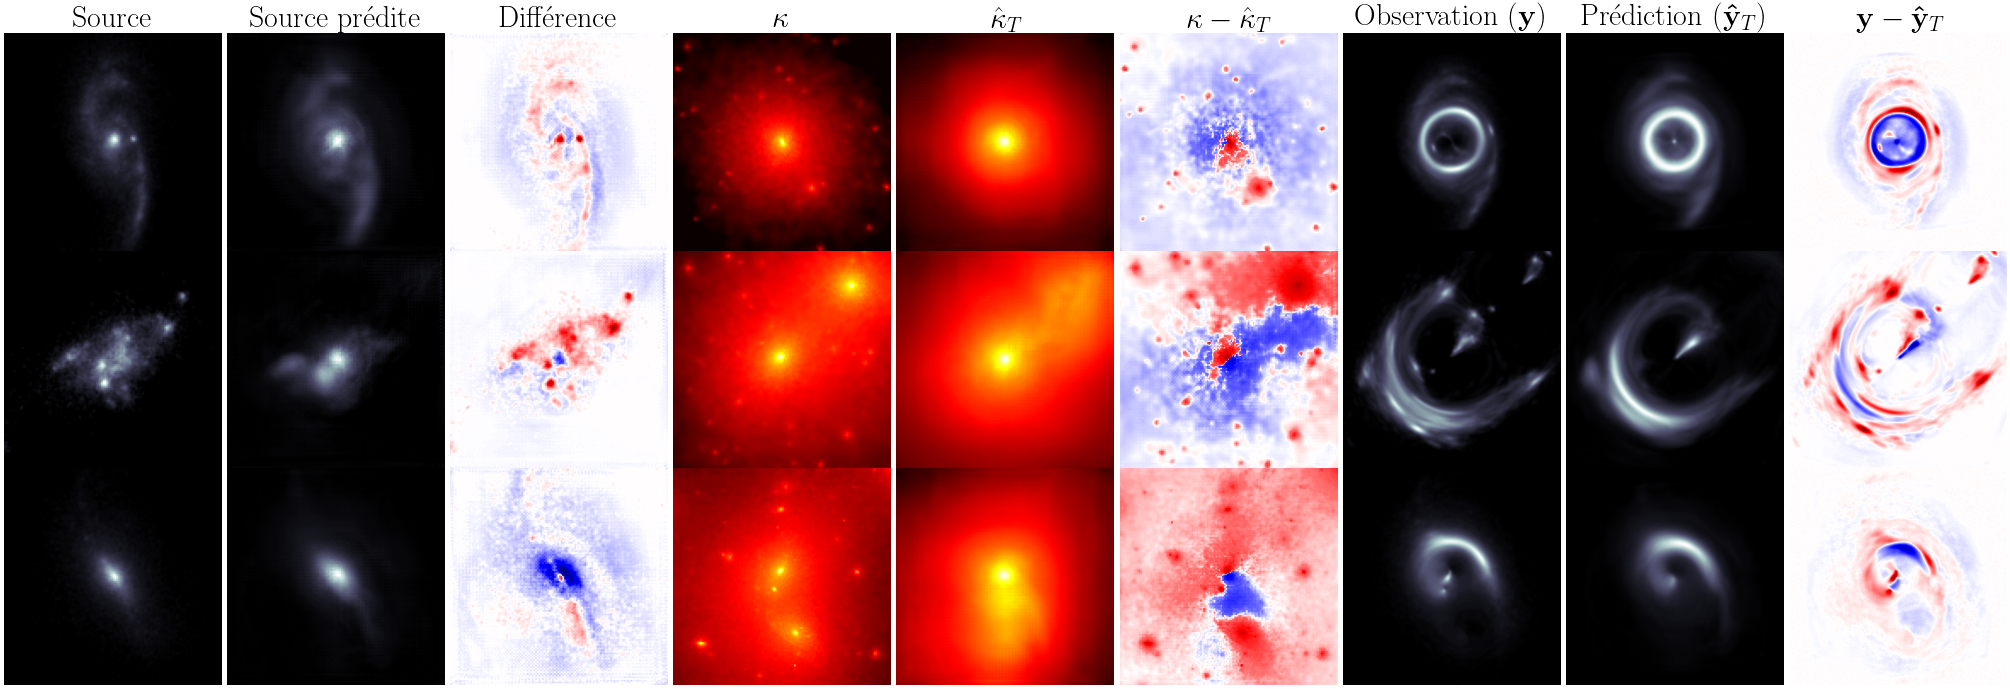

In [43]:
N = 3
indexes = [29, 59, 36]

fig, axs = plt.subplots(N, 9, figsize=(36, 4 * N))
for i, k in enumerate(indexes):
    lens = np.array(hf[f"data{k:03d}/lens"]).squeeze()
    source = np.array(hf[f"data{k:03d}/source"]).squeeze()
    kappa = np.array(hf[f"data{k:03d}/kappa"]).squeeze()
    lens_pred = np.array(hf[f"data{k:03d}/lens_pred"]).squeeze()
    source_pred = np.array(hf[f"data{k:03d}/source_pred"]).squeeze()[-1]
    kappa_pred = np.array(hf[f"data{k:03d}/kappa_pred"]).squeeze()[-1]
    

    axs[i, 0].imshow(source, cmap="bone", origin="lower")
    axs[i, 1].imshow(source_pred, cmap="bone", origin="lower")
    axs[i, 2].imshow(source - source_pred, cmap="seismic", norm=CenteredNorm(), origin="lower")
    
    axs[i, 3].imshow(kappa, cmap="hot", norm=LogNorm(vmin=5e-2), origin="lower")
    axs[i, 4].imshow(kappa_pred, cmap="hot", norm=LogNorm(vmin=5e-2), origin="lower")
    axs[i, 5].imshow(kappa - kappa_pred, cmap="seismic", norm=SymLogNorm(linthresh=1e-1, base=10, vmax=100, vmin=-100), origin="lower")
    
    axs[i, 6].imshow(lens, cmap="bone", origin="lower")
    axs[i, 7].imshow(lens_pred, cmap="bone", origin="lower")
    axs[i, 8].imshow(lens - lens_pred, cmap="seismic", norm=CenteredNorm(), origin="lower")
    
for i in range(N):
    for j in range(9):
        axs[i, j].axis("off")


axs[0, 0].set_title("Source")
axs[0, 1].set_title("Source prédite")
axs[0, 2].set_title("Différence")
axs[0, 3].set_title("$\kappa$")
axs[0, 4].set_title("$\hat{\kappa}_T$")
axs[0, 5].set_title("$\kappa - \hat{\kappa}_T$")
axs[0, 6].set_title("Observation ($\mathbf{y}$)")
axs[0, 7].set_title("Prédiction ($\mathbf{\hat{y}}_T$)")
axs[0, 8].set_title("$\mathbf{y} - \mathbf{\hat{y}}_T$")
plt.subplots_adjust(wspace=0, hspace=0);